# Average, rank analysis by functional group

In [1]:
import pandas as pd
import cPickle as pkl
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline

import seaborn as sns

In [2]:
pd.options.display.max_rows = 100

Protein synthesis rate per cell (not per transcript):

In [3]:
all_time_tes_annotated = pkl.load(open("../../parameters/all_time_tes_annotated.df"))
len(all_time_tes_annotated)

3732

We want to calculate a table of $\mu$ and $\sigma$ per functional category and time.

How many genes a functional group should have at minimum:

In [4]:
#min_genes = 35
min_genes = 50

In [5]:
all_time_tes_annotated.head()

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,Function
YAL001C,0.026667,0.023333,0.010833,0.015000,0.018333,0.036667,0.040000,NaN,0.036667,0.033333,NaN,0.043333,
YAL003W,0.142579,0.143810,0.098534,0.098801,0.104697,0.198377,0.197895,0.201111,0.202593,0.202376,0.242971,0.192971,Translation factors
YAL005C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Chaperones and folding catalysts
YAL007C,0.054167,0.061111,0.033788,0.038889,0.038333,0.094444,0.097778,0.088333,0.100833,0.098333,0.131667,0.076111,
YAL008W,0.074167,0.083333,0.049167,0.056000,0.055000,0.117500,0.118333,0.120000,0.130000,0.125000,0.153333,NaN,


In [6]:
functional_counts = all_time_tes_annotated.Function.value_counts(dropna=False)

We keep only functional groups with at least `min_genes` genes to calculate a better $\mu$ and $\sigma$.

We drop the unlabelled ones:

In [7]:
functional_counts[functional_counts >= min_genes].index.drop(u'')

Index([u'Other enzymes', u'Amino acid metabolism', u'Chromosome-related',
       u'Ribosome', u'Cofactor biosynthesis', u'Lipid and steroid metabolism',
       u'Chaperones and folding catalysts',
       u'Ribosome biogenesis in eukaryotes', u'Spliceosome', u'Glycolysis'],
      dtype='object')

In [8]:
functional_counts.head(n=11)

                                     1865
Other enzymes                         122
Amino acid metabolism                 116
Chromosome-related                    112
Ribosome                              110
Cofactor biosynthesis                  80
Lipid and steroid metabolism           66
Chaperones and folding catalysts       63
Ribosome biogenesis in eukaryotes      55
Spliceosome                            52
Glycolysis                             52
Name: Function, dtype: int64

In [9]:
all_time_tes_annotated_selected = all_time_tes_annotated[all_time_tes_annotated
                                                         .Function.isin(functional_counts[functional_counts >= 
                                                                                          min_genes].index.drop(u''))]
len(all_time_tes_annotated_selected)

828

In [10]:
all_time_tes_annotated_selected.head()

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,Function
YAL005C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Chaperones and folding catalysts
YAL011W,0.025000,0.031667,0.025000,0.017778,0.022500,NaN,0.041667,0.061667,NaN,0.065000,NaN,0.045000,Chromosome-related
YAL012W,0.112587,0.114672,0.075221,0.078857,0.080982,0.165161,0.164095,0.167304,0.165707,0.170325,0.206296,0.161124,Amino acid metabolism
YAL026C,0.024167,0.016111,0.013333,0.013333,0.014000,0.039167,0.031667,0.033333,0.043333,0.043333,0.066667,0.030000,Other enzymes
YAL032C,0.026667,0.045833,0.026667,0.028333,0.024583,0.065000,0.061667,0.058333,NaN,0.068333,NaN,0.063333,Spliceosome


Average translational efficiency by function:

In [11]:
means = all_time_tes_annotated_selected.groupby(['Function'], as_index=False).mean()
means.set_index('Function', inplace=True)

Display in color:

In [12]:
#cm = sns.light_palette("blue", as_cmap=True)
cm = sns.diverging_palette(240, 10, n=9, as_cmap=True)

means.round(decimals=3).style.background_gradient(cmap=cm)

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
Function,,,,,,,,,,,,
Amino acid metabolism,0.057,0.058,0.037,0.038,0.039,0.091,0.09,0.091,0.094,0.094,0.12,0.087
Chaperones and folding catalysts,0.06,0.061,0.04,0.041,0.043,0.092,0.092,0.093,0.095,0.095,0.117,0.089
Chromosome-related,0.035,0.037,0.023,0.024,0.025,0.057,0.058,0.06,0.062,0.063,0.083,0.058
Cofactor biosynthesis,0.042,0.043,0.028,0.029,0.029,0.069,0.071,0.071,0.074,0.072,0.098,0.066
Glycolysis,0.059,0.064,0.04,0.041,0.042,0.092,0.094,0.096,0.101,0.102,0.124,0.09
Lipid and steroid metabolism,0.05,0.05,0.032,0.034,0.034,0.078,0.08,0.08,0.083,0.082,0.106,0.078
Other enzymes,0.047,0.048,0.031,0.031,0.031,0.074,0.075,0.076,0.079,0.079,0.104,0.072
Ribosome,0.059,0.061,0.041,0.042,0.043,0.084,0.085,0.086,0.087,0.085,0.105,0.082
Ribosome biogenesis in eukaryotes,0.051,0.053,0.034,0.036,0.036,0.081,0.083,0.083,0.086,0.086,0.111,0.081


In [13]:
print(means.round(decimals=3).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &   0    &   300  &   600  &   900  &   1200 &   1500 &   1800 &   2100 &   2400 &   2700 &   3000 &   3300 \\
Function                          &        &        &        &        &        &        &        &        &        &        &        &        \\
\midrule
Amino acid metabolism             &  0.057 &  0.058 &  0.037 &  0.038 &  0.039 &  0.091 &  0.090 &  0.091 &  0.094 &  0.094 &  0.120 &  0.087 \\
Chaperones and folding catalysts  &  0.060 &  0.061 &  0.040 &  0.041 &  0.043 &  0.092 &  0.092 &  0.093 &  0.095 &  0.095 &  0.117 &  0.089 \\
Chromosome-related                &  0.035 &  0.037 &  0.023 &  0.024 &  0.025 &  0.057 &  0.058 &  0.060 &  0.062 &  0.063 &  0.083 &  0.058 \\
Cofactor biosynthesis             &  0.042 &  0.043 &  0.028 &  0.029 &  0.029 &  0.069 &  0.071 &  0.071 &  0.074 &  0.072 &  0.098 &  0.066 \\
Glycolysis                        &  0.059 &  0.064 &  0.040 &  0.041 &  0.042 &  0.092 &  0.094 &  0.096 &  0.1

Strangely `std()` does not work.

Show only ranks of means to reduce the noise and effect of different scales:

Average across time:

In [14]:
means.mean(axis=1).sort_values(ascending=False)

Function
Glycolysis                           0.078911
Chaperones and folding catalysts     0.076458
Amino acid metabolism                0.074478
Ribosome                             0.071671
Ribosome biogenesis in eukaryotes    0.068247
Lipid and steroid metabolism         0.065616
Other enzymes                        0.062294
Spliceosome                          0.060143
Cofactor biosynthesis                0.057644
Chromosome-related                   0.048687
dtype: float64

In [15]:
ranks = means.rank(ascending=False)
ranks

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
Function,,,,,,,,,,,,
Amino acid metabolism,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
Chaperones and folding catalysts,1.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
Chromosome-related,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Cofactor biosynthesis,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,8.0,9.0,9.0,9.0
Glycolysis,3.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Lipid and steroid metabolism,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0
Other enzymes,8.0,7.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
Ribosome,2.0,3.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,5.0,6.0,4.0
Ribosome biogenesis in eukaryotes,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0


In [16]:
ranks[3300]

Function
Amino acid metabolism                 3.0
Chaperones and folding catalysts      2.0
Chromosome-related                   10.0
Cofactor biosynthesis                 9.0
Glycolysis                            1.0
Lipid and steroid metabolism          6.0
Other enzymes                         7.0
Ribosome                              4.0
Ribosome biogenesis in eukaryotes     5.0
Spliceosome                           8.0
Name: 3300, dtype: float64

In [21]:
#ranks.sort([3300]).index
ranks[3300].sort_values()

Function
Glycolysis                            1.0
Chaperones and folding catalysts      2.0
Amino acid metabolism                 3.0
Ribosome                              4.0
Ribosome biogenesis in eukaryotes     5.0
Lipid and steroid metabolism          6.0
Other enzymes                         7.0
Spliceosome                           8.0
Cofactor biosynthesis                 9.0
Chromosome-related                   10.0
Name: 3300, dtype: float64

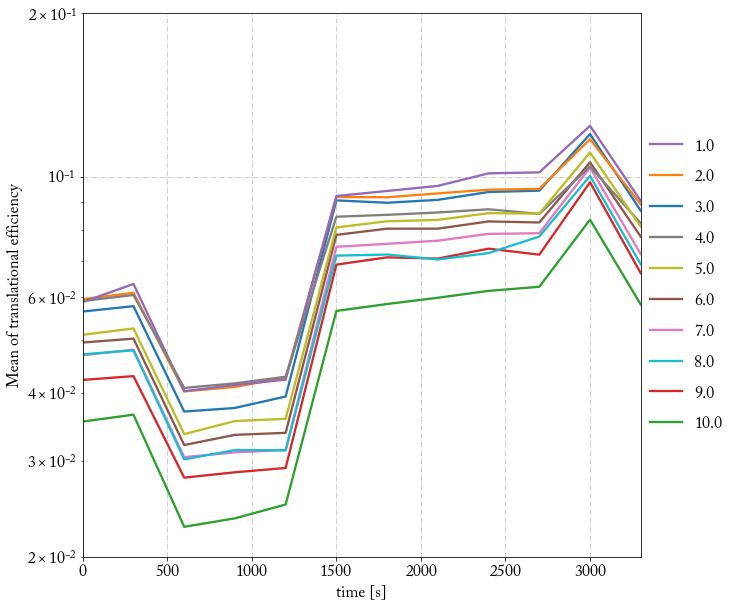

In [28]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = means.transpose().plot(linewidth=2.3)
ax.set_yscale('log')
ax.set_ylim([0.2, 0.02])

plt.xlabel('time [s]')
plt.ylabel('Mean of translational efficiency')
plt.gca().invert_yaxis()
#plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
# labels_tmp = ranks.sort([3300]).index
labels_tmp = ranks[3300].sort_values()
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pgf", bbox_inches='tight')
#plt.show()

In [29]:
sorted_functions = [('Ribosome', 0.12628066790927703),
 ('Glycolysis', 0.08185288434831853),
 ('Chaperones and folding catalysts', 0.07145962745808186),
 ('Amino acid metabolism', 0.062478004030412454),
 ('Ribosome biogenesis in eukaryotes', 0.0562636947388247),
 ('Lipid and steroid metabolism', 0.05269564143716751),
 ('Other enzymes', 0.05184456762611764),
 ('Cofactor biosynthesis', 0.04967116015179395),
 ('Spliceosome', 0.048536242667356795),
 ('Chromosome-related', 0.04100702207808541)]

See https://github.com/gittenberg/TRSL/blob/master/workbooks/analyses/07a%20TRSL_analyse_time-resolved_translation_efficiencies%20diff.%20cut-off%20and%20colors.ipynb

In [30]:
colordict = {function[0]: plt.get_cmap("Paired")(i) for i, function in enumerate(sorted_functions)}

Some manual adjustments:

In [31]:
colordict['Ribosome'], colordict['Lipid and steroid metabolism'] = \
colordict['Lipid and steroid metabolism'], colordict['Ribosome']

In [32]:
colordict['Spliceosome'], colordict['Cofactor biosynthesis'] = \
colordict['Cofactor biosynthesis'], colordict['Spliceosome']

In [47]:
list(ranks[3300].sort_values().index)

['Glycolysis',
 'Chaperones and folding catalysts',
 'Amino acid metabolism',
 'Ribosome',
 'Ribosome biogenesis in eukaryotes',
 'Lipid and steroid metabolism',
 'Other enzymes',
 'Spliceosome',
 'Cofactor biosynthesis',
 'Chromosome-related']

['Glycolysis', 'Chaperones and folding catalysts', 'Amino acid metabolism', 'Ribosome', 'Ribosome biogenesis in eukaryotes', 'Lipid and steroid metabolism', 'Other enzymes', 'Spliceosome', 'Cofactor biosynthesis', 'Chromosome-related']


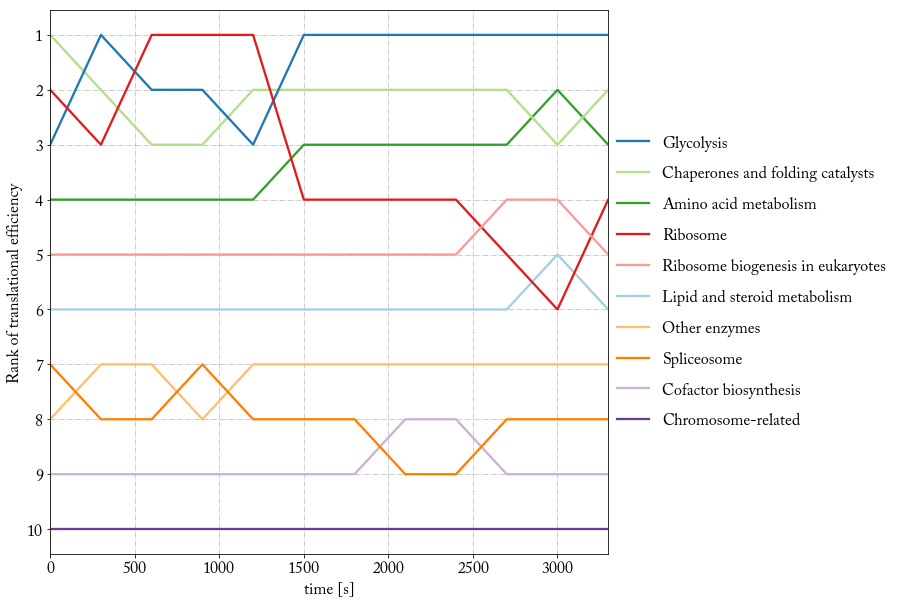

In [49]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3, color=[colordict.get(x, '#333333') for x in ranks.transpose().columns])

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
#labels_tmp = ranks.sort([1800]).index
labels_tmp = list(ranks[3300].sort_values().index)

print labels_tmp

# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[1800], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pgf", bbox_inches='tight')
#plt.show()

Same with Computer Modern for paper:

In [50]:
from matplotlib.pyplot import cm

In [51]:
colordict

{'Amino acid metabolism': (0.2, 0.6274509803921569, 0.17254901960784313, 1.0),
 'Chaperones and folding catalysts': (0.6980392156862745,
  0.8745098039215686,
  0.5411764705882353,
  1.0),
 'Chromosome-related': (0.41568627450980394,
  0.23921568627450981,
  0.6039215686274509,
  1.0),
 'Cofactor biosynthesis': (0.792156862745098,
  0.6980392156862745,
  0.8392156862745098,
  1.0),
 'Glycolysis': (0.12156862745098039,
  0.47058823529411764,
  0.7058823529411765,
  1.0),
 'Lipid and steroid metabolism': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725,
  1.0),
 'Other enzymes': (0.9921568627450981,
  0.7490196078431373,
  0.43529411764705883,
  1.0),
 'Ribosome': (0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745,
  1.0),
 'Ribosome biogenesis in eukaryotes': (0.984313725490196,
  0.6039215686274509,
  0.6,
  1.0),
 'Spliceosome': (1.0, 0.4980392156862745, 0.0, 1.0)}

https://stackoverflow.com/questions/47104862/pandas-dataframe-plot-colors-by-column-name

In [52]:
ranks.transpose().head()

Function,Amino acid metabolism,Chaperones and folding catalysts,Chromosome-related,Cofactor biosynthesis,Glycolysis,Lipid and steroid metabolism,Other enzymes,Ribosome,Ribosome biogenesis in eukaryotes,Spliceosome
0,4.0,1.0,10.0,9.0,3.0,6.0,8.0,2.0,5.0,7.0
300,4.0,2.0,10.0,9.0,1.0,6.0,7.0,3.0,5.0,8.0
600,4.0,3.0,10.0,9.0,2.0,6.0,7.0,1.0,5.0,8.0
900,4.0,3.0,10.0,9.0,2.0,6.0,8.0,1.0,5.0,7.0
1200,4.0,2.0,10.0,9.0,3.0,6.0,7.0,1.0,5.0,8.0


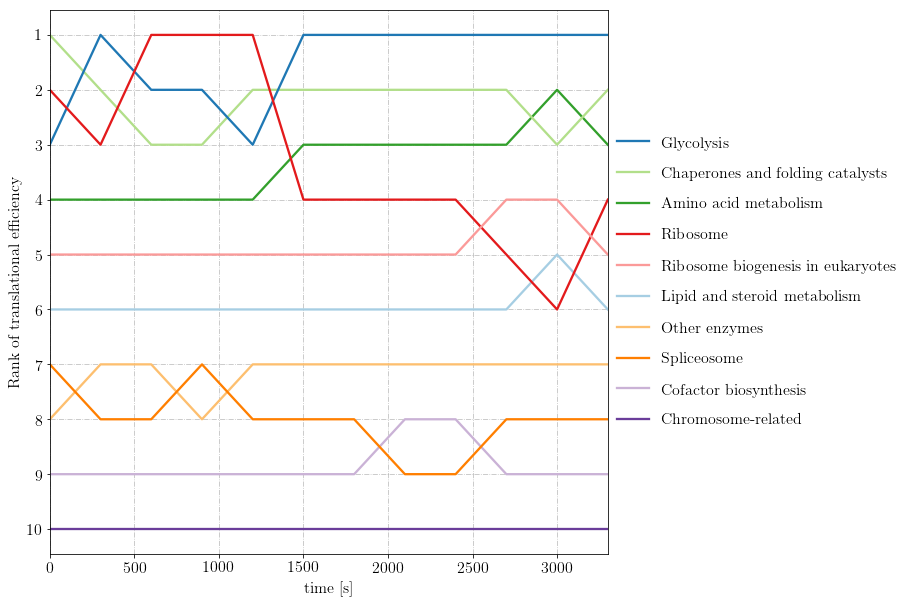

In [53]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
#matplotlib.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3, color=[colordict.get(x, '#333333') for x in ranks.transpose().columns])

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
# labels_tmp = ranks.sort([1800]).index
labels_tmp = list(ranks[1800].sort_values().index)

# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[1800], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pdf", bbox_inches='tight')
#plt.show()

TODO: look at Kendall's $\tau$ as per

https://stats.stackexchange.com/questions/29560/can-i-compare-ordinal-rankings-and-if-so-how

Same with Sans Serif for paper:

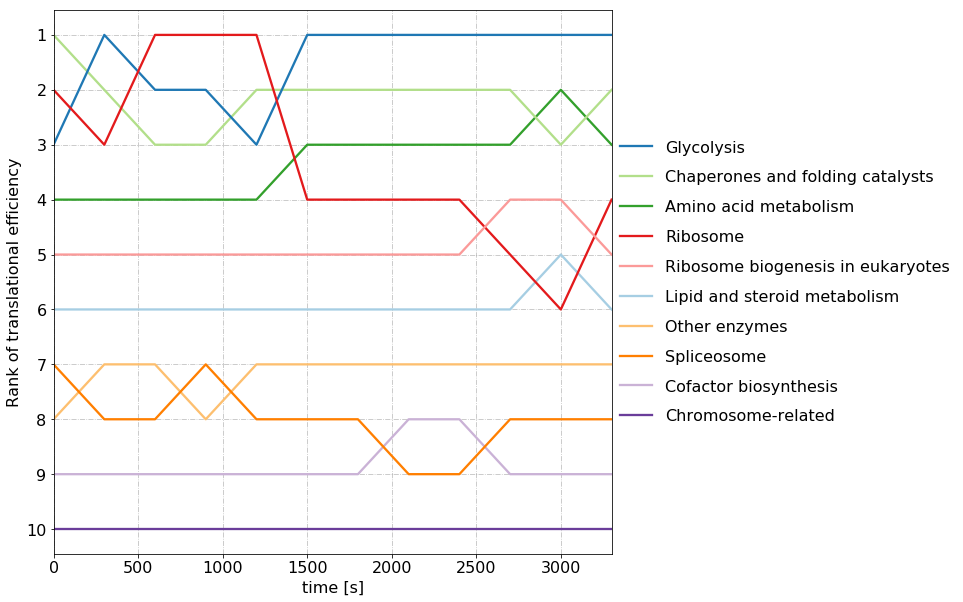

In [63]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'sans-serif', 'size': 28}
#matplotlib.rc('font', **font)

plt.rc('text', usetex=False)
plt.rc('font', family='sans-serif')

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3, color=[colordict.get(x, '#333333') for x in ranks.transpose().columns])

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
# labels_tmp = ranks.sort([1800]).index
labels_tmp = list(ranks[1800].sort_values().index)

# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[1800], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pdf", bbox_inches='tight')
#plt.show()